# IAB딥러닝 9월 15일 
> Overview - 이미지분석, 추천시스템, 텍스트분석의 비교정리, GAN

- toc:true
- branch: master
- badges: true
- comments: true
- author: 김준형

## Import

In [1]:
from fastai.vision.all import *
from fastai.vision.gan import *

## 이미지분석, 추천시스템, 텍스트분석의 정리
`-` 데이터는 모두 아래와 비슷하다.

(1) 데이터는 (X, y)의 형태로 정리되어 있음

(2) y는 알고자 하는 값 즉, y를 적절하게 추정하는 것이 중요

(3) X는 y를 추정하기 위해 필요한 정보


|$X$ = 설명변수 = 독립변수 | $y$ = 반응변수 = 종속변수 | 비고 | 순서 | 예시 | 
|:-:|:-:|:-:|:-:|:-:
|이미지|카테고리|합성곱신경망| 상관없음 | 개/고양이 이미지 구분 |
|유저,아이템|평점|추천시스템| 상관없음 | 넷플릭스 영화추천 |
|과거~오늘까지의주가|내일주가|순환신경망| 순서상관있음 | 주가예측 |
|처음 $m$개의 단어(혹은 문장)|이후 1개의 단어(혹은 문장)|순환신경망| 순서상관있음 | 챗봇, 텍스트생성 |
|처음 $m$개의 단어(혹은 문장)|카테고리|순환신경망| 순서상관있음 | 영화리뷰 텍스트 감정분류 | 

`-` 학습이란 주어진 자료 (X, y)를 잘 분석하여 X에서 y로 가는 어떠한 규칙(맵핑, 함수, 모델, 네트워크) 혹은 원리를 찾는 것

## GAN

`-` GAN은 생성모형 중 하나

`-` GAN의 원리는 경찰과 위조지폐범이 서로 경쟁을 통해 발전하는 모형으로 설명 가능

`-` 서로 적대적인(adversarial) 네트워크(network)를 동시에 학습시켜 가짜이미지를 생성(generate)

`-` 상황극

  - 위조범 : 가짜 돈을 만들어보자! (가짜 돈 생성)
        
  - 경찰 : 가짜 돈을 판별함
    
  - 위조범 : 더 정교하게 만들어야겠다!
    
  - 경찰 : 진짜 돈인가? 가짜 돈인가? (구분이 어려워짐)
    
  - 위조범 : 더 더 정교하게 만들자!
    
  - 경찰 : 판별능력을 업그레이드 하자!
    
  - 반복...

`-` 경찰이 진짜 돈과 가짜 돈을 구분하지 못할 때( = 진짜 이미지를 0.5의 확률로 진짜라고 판단할 때 = 가짜 이미지를 0.5의 확률로 가짜라고 판단할 때) 학습을 멈춤

### 1단계

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)

In [12]:
dblock = DataBlock(blocks = (TransformBlock, ImageBlock),
          get_x = generate_noise,
          get_items = get_image_files,
          item_tfms = Resize(32))
dls = dblock.dataloaders(path) 

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


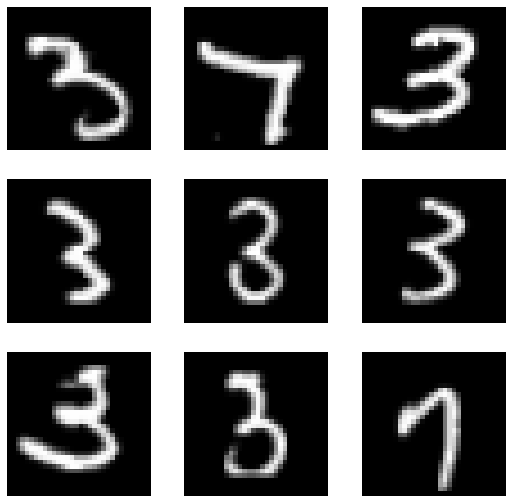

In [11]:
dls.show_batch()

### 2단계

In [13]:
counterfeiter = basic_generator(32, n_channels = 3, n_extra_layers = 1)  # 32 * 32 컬러 이미지 출력
police = basic_critic(32, n_channels = 3, n_extra_layers = 1)  # 32 * 32 컬러 이미지 입력

In [14]:
lrnr = GANLearner.wgan(dls,counterfeiter,police) 

### 3단계

In [15]:
lrnr.fit(10)

C:\Users\USER\anaconda3\lib\site-packages\fastai\callback\core.py:69: UserWarning: You are shadowing an attribute (generator) that exists in the learner. Use `self.learn.generator` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
C:\Users\USER\anaconda3\lib\site-packages\fastai\callback\core.py:69: UserWarning: You are shadowing an attribute (critic) that exists in the learner. Use `self.learn.critic` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
C:\Users\USER\anaconda3\lib\site-packages\fastai\callback\core.py:69: UserWarning: You are shadowing an attribute (gen_mode) that exists in the learner. Use `self.learn.gen_mode` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


epoch,train_loss,valid_loss,gen_loss,crit_loss,time
0,-0.536390,0.351954,0.351954,-0.755480,00:19
1,-0.575676,0.368697,0.368697,-0.764731,00:17
2,-0.579221,0.401217,0.401217,-0.761131,00:17
3,-0.578511,0.267153,0.267153,-0.764614,00:16
4,-0.577176,0.245672,0.245672,-0.754542,00:17
5,-0.561378,0.314552,0.314552,-0.735245,00:17
6,-0.563071,0.291162,0.291162,-0.738663,00:17
7,-0.551359,0.266653,0.266653,-0.733204,00:17
8,-0.535449,0.339633,0.339633,-0.735344,00:17
9,-0.502449,0.206701,0.206701,-0.687934,00:17


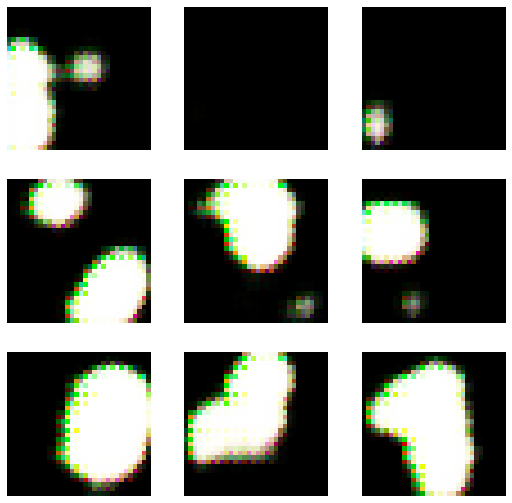

In [16]:
lrnr.show_results()

In [17]:
lrnr.fit(20)  # 추가로 20회 더 진행

epoch,train_loss,valid_loss,gen_loss,crit_loss,time
0,-0.463692,0.356721,0.356721,-0.649763,00:17
1,-0.517553,0.192659,0.192659,-0.432233,00:17
2,-0.537279,0.309562,0.309562,-0.716175,00:17
3,-0.498665,0.248254,0.248254,-0.710489,00:17
4,-0.516934,0.245185,0.245185,-0.664505,00:17
5,-0.530214,0.292247,0.292247,-0.728173,00:16
6,-0.512573,0.280468,0.280468,-0.712356,00:16
7,-0.492679,0.284331,0.284331,-0.664606,00:16
8,-0.365144,0.193021,0.193021,-0.294480,00:16
9,-0.501201,0.332451,0.332451,-0.693011,00:16


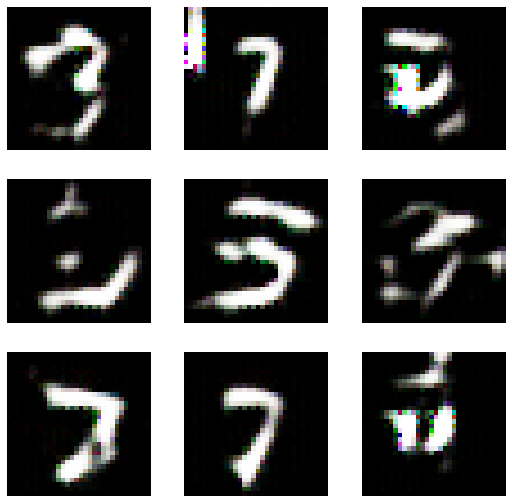

In [18]:
lrnr.show_results()

`-` IAB 딥러닝 수업 자료를 기반으로 공부한 내용입니다.